<a href="https://colab.research.google.com/github/Bryan-Az/Foundation-Model-Showcase/blob/main/Part%20C%20-%20Multimodal%20Showcase/Multimodal_Foundational_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# these libraries will help us edit and visualize data
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# this library will help us import some sample data we can send in our calls to models
from vega_datasets import data
cars = data.cars()

source = data.iris()

np.random.seed(0)
df = pd.DataFrame({'x': np.random.normal(0, 1, 1000)})


# Google's Gemini 1.5

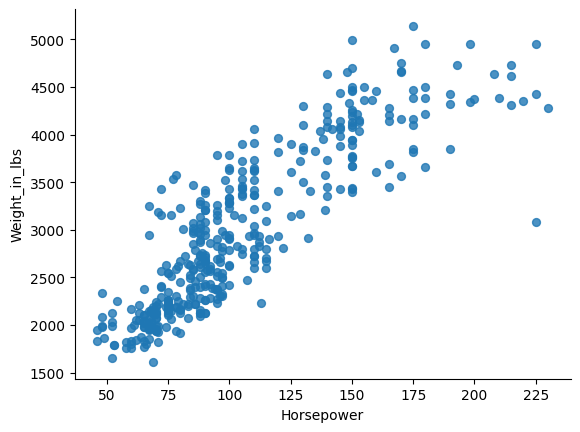

In [7]:
# @title A Plot of Horsepower vs Weight_in_lbs in the sample 'Cars' dataset
from matplotlib import pyplot as plt
cars.plot(kind='scatter', x='Horsepower', y='Weight_in_lbs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Capability 1: Providing theory into the underlying data generating process of numerical car related data.

By looking at the above plot, we can notice there is a positive correlation between the horsepower and the weight of cars. Let's ask Gemini 1.5 if it can provide us potential underlying reasons contributing to this relationship.

### **Prompt:**
Why is there a positive relationship between horsepower and weight_in_lbs in vega_datasets' cars data?

### **Gemini:**
Heavier cars often require more powerful engines to achieve comparable acceleration and performance to lighter cars. This is due to inertia.

Here are some potential reasons for the positive correlation:

- **Engine Size**: Larger engines generally produce more horsepower and also add weight to the vehicle.
- **Vehicle Type**: Larger vehicles like trucks and SUVs tend to be heavier and require more horsepower for towing, hauling, and off-road capabilities.
- **Safety Features**: Larger cars often have more safety features, which can add weight. They may also have more powerful engines to compensate for the added weight.
- **Luxury Features**: Luxury cars often include heavier features such as advanced sound systems, larger wheels, and more comfortable interiors. They also often come with powerful engines for a smoother and more powerful driving experience.

## Capability 2: Hypothesis testing of one of the theories relating to the positive correlation between horsepower and weight_in_lbs.

In [8]:
# Create a new column is_SUV_or_Truck
cars['is_SUV_or_Truck'] = cars['Name'].apply(lambda x: 1 if any(keyword in x for keyword in ['SUV', 'Truck']) else 0)

# Separate the data into two groups
group_a = cars[cars['is_SUV_or_Truck'] == 1]['Weight_in_lbs']
group_b = cars[cars['is_SUV_or_Truck'] == 0]['Weight_in_lbs']

# Number of bootstrap iterations
n_iterations = 10000

# Create an empty list to store the differences in means
diff_means = []

# Perform bootstrapping
for i in range(n_iterations):
  # Sample with replacement from each group
  sample_a = np.random.choice(group_a, size=len(group_a), replace=True)
  sample_b = np.random.choice(group_b, size=len(group_b), replace=True)

  # Calculate the difference in means
  diff_means.append(np.mean(sample_a) - np.mean(sample_b))

# Calculate the p-value
p_value = np.sum(np.array(diff_means) <= 0) / n_iterations

# Print the results
print(f'P-value: {p_value}')


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


P-value: 0.0


## Capability 3: Creating a new feature related to cars based on available data.

It seems that Gemini provided a great starting point for conducting a bootstrapping A/B test to test the hypothesis that we *also* helped generate using Gemini. However, it is not informative as the data does not contain a feature that provides a clear distinction between cars that are SUV's and/or trucks. To continue answering our question, we would need to either introduce more accurate data by simply asking gemini if it could provide us a guess by evaluating the 'name' feature in cars.

### Prompt:

This is a good starting point, can you re-evaluate the 'name feature' and introduce more keywords?

### Gemini:

In [9]:
cars['is_SUV_or_Truck'] = cars['Name'].apply(lambda x: 1 if any(keyword in x for keyword in ['SUV', 'Truck', 'Jeep', 'Land Cruiser', 'Blazer', 'Rampage', 'Bronco', 'Cherokee', 'Tahoe', 'Yukon', 'Suburban', 'Expedition', 'Navigator', 'Durango', 'Aspen', 'Mountaineer', 'Pilot', 'Pathfinder', '4Runner', 'Highlander', 'Sequoia', 'Armada', 'QX56']) else 0)

In [11]:
cars['is_SUV_or_Truck'].sum()

0

Despite the good effort, Gemini may not have evaluated or preprocessed the data sufficiently with just a few prompts. However, Gemini seems to provide a good starting point across a variety of coding tasks within the domain of vehicles.

## Capability 4: Asking Gemini to provide code to call the Claude api with a sample prompt and parsing of the response.

Note: API key is stored privately within the jupyter notebook environment and was NOT provided by Gemini.

# Anthropic's Claude
The 'source' dataset is a sample dataset of flower species with their respective sepal and petal related dimension data.

In [17]:
!pip install anthropic

import anthropic

In [14]:
source.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
from google.colab import userdata

In [21]:
anthropic.api_key = userdata.get('claude_key')

In [ ]:
client = anthropic.Client(api_key=userdata.get('claude_key')) # replace YOUR_API_KEY with your actual key

## Capability 5: Asking Claude to search for an image of a setosa with a sepal length of 5.

In [31]:
prompt = f"""\
Human: Can you search for an image of a setosa with a sepal length of 5?

Assistant:
"""
response = client.completions.create(
    model="claude-2",
    max_tokens_to_sample=1000,
    prompt=prompt,
    temperature=0,
    stop_sequences=["\n"]
)

print(response.completion)


 Unfortunately I do not have access to an image database to search for specific images. As an AI assistant without visual perception capabilities, I cannot search for or provide images. However, I can describe what a setosa flower with a sepal length of 5 might look like based on the typical features of setosa iris flowers:


It seems Claude is not capable of searching the internet and does not connect to any database of images provided by Anthropic, thus it is necessary for a developer to connect their own image database to provide image search capability.

## Capability 6: Asking Claude to provide code that will allow an auxiliary connection to Google Image search.

In [68]:
search_prompt = f"""\
Can you help me connect to Google Image search with python code?
"""
response = client.messages.create(
    model="claude-2.1",
    max_tokens=1000,
    system=search_prompt,
    temperature=0,
    messages=[
            {"role": "user", "content": search_prompt}
    ]
)

In [80]:
import html
from IPython.display import display, HTML

In [81]:
text_response = response.content[0].text
display(HTML(f"<pre>{html.escape(text_response)}</pre>"))

## Capability 7: Asking Claude how to prepare a Custom Search API key from Google, the first step in building the auxiliary search tool.

In [83]:
google_key_prompt = f"""\
Can you help guide me in how to prepare a Custom Search API key from Google?
"""

In [84]:
response = client.messages.create(
    model="claude-2.1",
    max_tokens=1000,
    system=google_key_prompt,
    temperature=0,
    messages=[
            {"role": "user", "content": google_key_prompt}
    ]
)

In [85]:
text_response = response.content[0].text
display(HTML(f"<pre>{html.escape(text_response)}</pre>"))

## Capability 8: Asking Claude more about Step 7 in setting up the auxiliary google image search engine tool (is the custom search engine ID the OAuth 2.0 client ID?).

In [89]:
google_client_prompt = f"""\
Is the custom search engine ID used when calling the google cloud api platform's custom search api the OAuth 2.0 client ID?
"""

In [90]:
response = client.messages.create(
    model="claude-2.1",
    max_tokens=1000,
    system=google_client_prompt,
    temperature=0,
    messages=[
            {"role": "user", "content": google_client_prompt}
    ]
)

In [91]:
text_response = response.content[0].text
display(HTML(f"<pre>{html.escape(text_response)}</pre>"))

After some more searching on my part, it seems that in order to create a 'Custom Search Engine ID' to connect a tool to Claude via Jupyter and search for images via text prompting requires creating a 'programmable search engine' on programmablesearchengine.google.com

## Capability 9: Let's ask Claude to help us call the openai GPT-4o api with python code.

In [92]:
openai_prompt = f"""\
Can you help me call the openai GPT-4o api with python code?
"""

In [93]:
response = client.messages.create(
    model="claude-2.1",
    max_tokens=1000,
    system=openai_prompt,
    temperature=0,
    messages=[
            {"role": "user", "content": openai_prompt}
    ]
)

In [94]:
text_response = response.content[0].text
display(HTML(f"<pre>{html.escape(text_response)}</pre>"))

According to Claude, the GPT-4o API is 'not yet released' by OpenAI. However, I found that this is wrong and it is possible to call the GPT-4o API with python code. The general process may not be that different in terms of the actual code used to call the API.

# OpenAI's GPT-4o

## Capability 10:

In [96]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 5.6 MB/s eta 0:00:00


In [101]:
import openai
from openai import OpenAI

prompt = [
        {
            "role": "user",
            "content": "Can you describe the image at this link? https://media.istockphoto.com/id/1978277148/photo/echeveria-setosa-home-succulent-close-up.jpg?s=2048x2048&w=is&k=20&c=wU24jjWNPiJsn_tmbYmr7-5eBSsbaZd4HfH15w1t7o8=",
        },
]

client = OpenAI(
    api_key=userdata.get('openai_key')
)

response = client.chat.completions.create(model="gpt-4", messages=prompt)

In [110]:
print(response.model_dump_json(indent=2))

{
  "id": "chatcmpl-A1kWkOvijPPtfnixGcm1TqiFDE4kY",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "I'm an AI and currently unable to directly view or access images from hyperlinks. However, based on the description in the URL, the image could be a close-up shot of an Echeveria Setosa, which is a type of home succulent plant.",
        "refusal": null,
        "role": "assistant",
        "function_call": null,
        "tool_calls": null
      }
    }
  ],
  "created": 1724980542,
  "model": "gpt-4-0613",
  "object": "chat.completion",
  "service_tier": null,
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 54,
    "prompt_tokens": 93,
    "total_tokens": 147
  }
}


It seems by providing a link to an image to the OpenAI model, we found that it is unable to be parsed. This is in contrast to Gemini which is able to parse long youtube videos via their link. This may return a potentially different answer if we were to provide the image directly as a JPG.